In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms.functional as transform
import torch
import torch as t
import itertools
import EnsembleXAI.Metrics as M

In [15]:
!kaggle competitions download -f "/ILSVRC/Data/CLS-LOC/train/n01491361/n01491361_9052.JPEG" -p ./images -c imagenet-object-localization-challenge --force


  0%|          | 0.00/82.7k [00:00<?, ?B/s]
100%|##########| 82.7k/82.7k [00:00<00:00, 4.11MB/s]


In [4]:
image = Image.open('D:\\Mini\\Inzynierka\\input\\ImageNetS50\\train-semi-segmentation\\n01491361\\n01491361_9052.png')
x = transform.to_tensor(image)
x.shape

torch.Size([3, 480, 640])

In [5]:
t.all(x[0] == 0)

tensor(False)

In [6]:
logical_mask = t.any(x != 0, dim=-3, keepdim=True).squeeze()

In [7]:
t.all(logical_mask == 0)

tensor(False)

In [8]:
logical_mask.float()

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

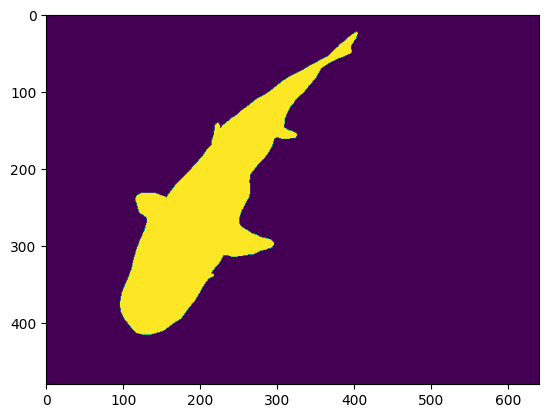

In [9]:
plt.imshow(logical_mask)
plt.show()

In [10]:
img = Image.open("D:\\Mini\\Inzynierka\\input\\ImageNet\\n01491361\\n01491361_13773.JPEG")
x = transform.to_tensor(img)

In [11]:
logical_mask.shape

torch.Size([480, 640])

In [11]:
reshaped_mask = logical_mask.repeat(3,1,1)

In [12]:
x[reshaped_mask] = 0

In [13]:
x[0][180][250]

tensor(0.)

# Proper tests

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms.functional as transform
import torch
import torch as t
import itertools
import EnsembleXAI.Metrics as M

In [15]:
masks = torch.BoolTensor([[[False, True, False]]]).repeat(2,3,1)
masks

tensor([[[False,  True, False],
         [False,  True, False],
         [False,  True, False]],

        [[False,  True, False],
         [False,  True, False],
         [False,  True, False]]])

In [16]:
images = torch.Tensor([[[[1,2,3], [4,5,6], [7,8,9]], [[1,2,3], [4,5,6], [7,8,9]], [[1,2,3], [4,5,6], [7,8,9]]]]).repeat(2,1,1,1)
masks = torch.BoolTensor([[[False, True, False], [False, True, False], [False, True, False]]]).repeat(2,1,1)
images.shape, masks.shape

(torch.Size([2, 3, 3, 3]), torch.Size([2, 3, 3]))

In [17]:
x = M.replace_masks(images, masks, 0.1)

In [18]:
torch.all(x[:, :, :, 1]==0.1)

tensor(True)

In [19]:
torch.all(x[:, :, :, [0,2]] == images[:, :, :, [0,2]])

tensor(True)

In [20]:
def replace_masks(images: torch.Tensor, masks: torch.Tensor, value = 0) -> torch.Tensor:
    temp_images = torch.clone(images)
    reshaped_masks = masks.unsqueeze(dim=1).repeat(1, 3, 1, 1)
    temp_images[reshaped_masks] = value
    return temp_images

In [21]:
masks

tensor([[[False,  True, False],
         [False,  True, False],
         [False,  True, False]],

        [[False,  True, False],
         [False,  True, False],
         [False,  True, False]]])

In [22]:
images.shape

torch.Size([2, 3, 3, 3])

In [23]:
[x.shape for x in M.tensor_to_list_tensors(images, 2)]

[torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3])]

In [24]:
torch.linalg.matrix_norm(torch.ones([3,3]))

tensor(3.)

In [25]:
M.matrix_2_norm(2*torch.ones(4,4,4), torch.zeros(4,4,4), sum_dim=-1)

tensor(16.)

In [26]:
plus_2d = torch.Tensor([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]])
cross_2d = torch.Tensor([[1, 0, 1],
                         [0, 1, 0],
                         [1, 0, 1]])
intersect = M._intersection_mask(plus_2d, cross_2d)

In [27]:
intersect[1,1] = False

In [28]:
torch.any(intersect)

tensor(False)

In [29]:
plus_threshold_2d = torch.Tensor([[0, 0.2, 0],
                                          [0.5, 0.7, 0.5],
                                          [0, 0.2, 0]])
blus_threshold_2d = torch.Tensor([[0, 1, 0],
                                  [1, 1, 1],
                                  [0, 1, 0]])
intersect = M._intersection_mask(plus_threshold_2d, blus_threshold_2d, threshold1=0.3)

In [30]:
intersect

tensor([[False, False, False],
        [ True,  True,  True],
        [False, False, False]])

In [31]:
intersect[1]

tensor([True, True, True])

In [32]:
plus_2d = torch.Tensor([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]])
cross_2d = torch.Tensor([[1, 0, 1],
                         [0, 1, 0],
                         [1, 0, 1]])
union = M._union_mask(plus_2d, cross_2d)

In [33]:
union

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [34]:
union_threshold_a = torch.Tensor([[1, 0.4, 1],
                                  [1, 0.4, 1],
                                  [0, 0, 0]])
union_threshold_b = torch.Tensor([[0, 0, 0],
                                  [0, 0, 0],
                                  [0.6, 0.6, 0.6]])
union = M._union_mask(union_threshold_a, union_threshold_b, threshold1=0.5)

In [35]:
union

tensor([[ True, False,  True],
        [ True, False,  True],
        [ True,  True,  True]])

In [36]:
correct_union_05 = torch.BoolTensor([[True, False,  True],
                                     [True, False,  True],
                                     [True,  True,  True]])
torch.all(union==correct_union_05)

tensor(True)

In [37]:
ones = torch.Tensor([1]).repeat(3, 4, 10, 10)
twos = 2*torch.Tensor([1]).repeat(3, 4, 10, 10)
tensor = torch.cat([ones, twos])
xyz = M.tensor_to_list_tensors(tensor, depth=2)
diffs = [
    M.matrix_2_norm(exp1, exp2).item()
    for exp1, exp2 in itertools.combinations(xyz, 2)
]

In [38]:
torch.cat([ones, twos]).shape

torch.Size([6, 4, 10, 10])

In [39]:
1/(max(diffs)+1)

0.09090909879069752

In [40]:
M.consistency(tensor)
# test confidence impact ratio i decision impact ratio i stability i wszystko xd

0.09090910106897354

# TEST STABILITY

In [41]:
M.stability

<function EnsembleXAI.Metrics.stability(explanator: Callable, image: torch.Tensor, images_to_compare: torch.Tensor, epsilon: float = 0.1) -> torch.Tensor>

In [42]:
def predict_dummy(tensor: torch.Tensor, classes=1000):
    return torch.ones([tensor.shape[0], classes])/classes

In [43]:
n = 100
images_tensor = torch.ones([n, 3, 32, 32])
expls = torch.randn([n, 1, 32, 32])

In [44]:
a, b = M._impact_ratio_helper(images_tensor, predict_dummy, expls, 0, 0.5)

In [45]:
torch.all(a==0.0010)

tensor(True)

In [46]:
c, d = torch.max(a, 1)

In [47]:
(d == torch.zeros([100])).float()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
n = 100
images_tensor = torch.ones([n, 3, 32, 32])
expls = torch.randn([n, 1, 32, 32])
baseline = 0
threshold = 0.5
org = M.decision_impact_ratio(images_tensor, predict_dummy, expls, threshold, baseline)

In [49]:
org

0.0

In [50]:
b.shape

torch.Size([100, 1000])

In [51]:
n = 100
images_tensor = torch.ones([n, 3, 32, 32])
expls = torch.randn([n, 1, 32, 32])
baseline = 0
threshold = 0.5
value = M.confidence_impact_ratio(images_tensor, predict_dummy, expls, threshold, baseline)

In [52]:
value

0.0

In [53]:
simple_explanation = plus_2d.unsqueeze(0).unsqueeze(0)/2
simple_mask = plus_2d.unsqueeze(0)
M.accordance_recall(simple_explanation, simple_mask, threshold=0.6)

tensor([0.])

In [54]:
def val(expl, mask, metric):
    expl = expl.unsqueeze(0).unsqueeze(0)
    mask = mask.unsqueeze(0)
    return metric(expl, mask)

In [55]:
val(plus_2d, cross_2d, M.accordance_recall)

tensor([0.2000])

In [56]:
val(cross_2d, plus_2d, M.accordance_recall)

tensor([0.2000])

In [57]:
val(plus_2d, plus_2d, M.accordance_recall)

tensor([1.])

In [58]:
val(plus_2d, cross_2d, M.accordance_precision).item()

0.20000000298023224

In [59]:
val(cross_2d, plus_2d, M.accordance_precision).item()

0.20000000298023224

In [60]:
val(plus_2d, plus_2d, M.accordance_precision).item()

1.0

In [61]:
expl = torch.cat((plus_2d.unsqueeze(0).unsqueeze(0), cross_2d.unsqueeze(0).unsqueeze(0)))
mask = torch.cat((cross_2d.unsqueeze(0), plus_2d.unsqueeze(0)))
acc_recall = M.accordance_recall(expl, mask)
acc_prec = M.accordance_precision(expl, mask)

In [62]:
values = 2 * (acc_recall * acc_prec) / (acc_recall + acc_prec)
value = torch.sum(values) / values.shape[0]

In [63]:
values

tensor([0.2000, 0.2000])

In [64]:
value

tensor(0.2000)

In [65]:
M.F1_score(expl, mask)

0.20000001788139343

In [70]:
M.intersection_over_union(expl, mask)

0.1111111119389534

In [66]:
acc_prec

tensor([0.2000, 0.2000])

In [67]:
acc_recall

tensor([0.2000, 0.2000])

In [68]:
squeezed_expl = expl.squeeze(dim=1)
overlaping_area = M._intersection_mask(squeezed_expl, mask, threshold1=threshold)
divisor = torch.sum(torch.abs(squeezed_expl) > threshold, dim=(-2, -1))
value = torch.sum(overlaping_area, dim=(-2, -1)) / divisor

In [69]:
torch.sum(overlaping_area, dim=(-2, -1))/divisor

tensor([0.2000, 0.2000])